importing necessary libraries

In [1]:
import os

In [2]:
import tensorflow as tf

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from matplotlib.image import imread

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import *

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [6]:
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [8]:
from sklearn.metrics import classification_report,confusion_matrix

In [9]:
train_path = 'E:/Faculta/_LICENTA/_Aplicatie/pozeModel2SauModelCuToateBolile/_trainPics'
test_path = 'E:/Faculta/_LICENTA/_Aplicatie/pozeModel2SauModelCuToateBolile/_testPics'

In [10]:
image_shape = (300,300,1)

In [11]:
image_generator = ImageDataGenerator(rotation_range=25,
                                    width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.1,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

In [12]:
image_generator.flow_from_directory(train_path)

Found 38323 images belonging to 15 classes.


In [13]:
image_generator.flow_from_directory(test_path)

Found 9481 images belonging to 15 classes.


In [14]:
complexModel = Sequential()

complexModel.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
complexModel.add(MaxPool2D(pool_size=(2,2)))

complexModel.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
complexModel.add(MaxPool2D(pool_size=(2,2)))

complexModel.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
complexModel.add(MaxPool2D(pool_size=(2,2)))

complexModel.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
complexModel.add(MaxPool2D(pool_size=(2,2)))

complexModel.add(Flatten())

complexModel.add(Dense(256,activation='relu'))
complexModel.add(Dropout(0.5))

complexModel.add(Dense(15,activation='softmax'))

complexModel.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
complexModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [16]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)
batch_size = 16

In [17]:
train_images_model = image_generator.flow_from_directory(train_path,target_size=image_shape[:2],
                                                  color_mode='grayscale',
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                        shuffle=True)

Found 38323 images belonging to 15 classes.


In [18]:
test_images_model = image_generator.flow_from_directory(test_path,target_size=image_shape[:2],
                                                  color_mode='grayscale',
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=False)

Found 9481 images belonging to 15 classes.


In [19]:
train_images_model.class_indices

{'Atelectasis': 0,
 'Cardiomegaly': 1,
 'Consolidation': 2,
 'Edema': 3,
 'Effusion': 4,
 'Emphysema': 5,
 'Fibrosis': 6,
 'Hernia': 7,
 'Infiltration': 8,
 'Mass': 9,
 'NoFindings': 10,
 'Nodule': 11,
 'PleuralThickening': 12,
 'Pneumonia': 13,
 'Pneumothorax': 14}

In [20]:
test_images_model.class_indices

{'Atelectasis': 0,
 'Cardiomegaly': 1,
 'Consolidation': 2,
 'Edema': 3,
 'Effusion': 4,
 'Emphysema': 5,
 'Fibrosis': 6,
 'Hernia': 7,
 'Infiltration': 8,
 'Mass': 9,
 'NoFindings': 10,
 'Nodule': 11,
 'PleuralThickening': 12,
 'Pneumonia': 13,
 'Pneumothorax': 14}

In [21]:
total_number_of_pictures = test_images_model.n + train_images_model.n
total_number_of_pictures

47804

In [22]:
#de schimbat path ul
checkpoint_path = 'E:/Faculta/_LICENTA/_Aplicatie/pozeModel2SauModelCuToateBolile/_checkpoints/checkPointComplexModel.h5'
checkpoint_folder = os.path.dirname(checkpoint_path)

In [23]:
checkpoint_call = ModelCheckpoint(checkpoint_path,
                                  save_weighs_only=True,
                                  verbose=1)

In [24]:
trainedModel = complexModel.fit(train_images_model,
                                     steps_per_epoch=int(math.ceil(train_images_model.n/batch_size)),
                                     epochs=10,
                                     validation_data= test_images_model,
                                     callbacks = [early_stop,checkpoint_call],
                                     verbose=1)

Epoch 1/10
2396/2396 [==============================] - 3008s 1s/step - loss: 2.7762 - accuracy: 0.6157 - val_loss: 1.7271 - val_accuracy: 0.5327

Epoch 00001: saving model to E:/Faculta/_LICENTA/_Aplicatie/pozeModel2SauModelCuToateBolile/_checkpoints\checkPointComplexModel.h5
Epoch 2/10
2396/2396 [==============================] - 5375s 2s/step - loss: 1.4838 - accuracy: 0.6209 - val_loss: 1.7442 - val_accuracy: 0.5327

Epoch 00002: saving model to E:/Faculta/_LICENTA/_Aplicatie/pozeModel2SauModelCuToateBolile/_checkpoints\checkPointComplexModel.h5
Epoch 3/10
2396/2396 [==============================] - 3884s 2s/step - loss: 1.4610 - accuracy: 0.6266 - val_loss: 1.7340 - val_accuracy: 0.5327

Epoch 00003: saving model to E:/Faculta/_LICENTA/_Aplicatie/pozeModel2SauModelCuToateBolile/_checkpoints\checkPointComplexModel.h5


In [25]:
complexModel.save('complexModel.h5')

In [29]:
complexModel.history.history

{'loss': [1.6979446411132812, 1.4717916250228882, 1.4686223268508911],
 'accuracy': [0.6221068501472473, 0.6245335936546326, 0.6245335936546326],
 'val_loss': [1.7271082401275635, 1.7442244291305542, 1.7340312004089355],
 'val_accuracy': [0.5327497124671936, 0.5327497124671936, 0.5327497124671936]}

In [32]:
metrics = pd.DataFrame(complexModel.history.history)

In [34]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

<AxesSubplot:>

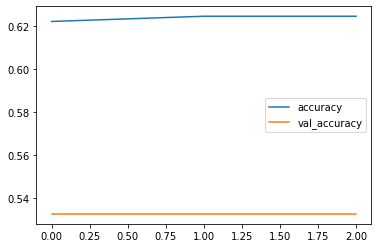

In [36]:
metrics[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

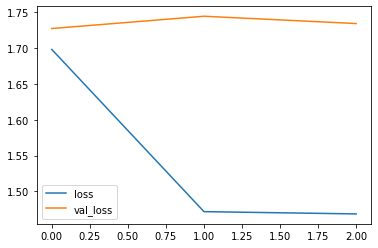

In [37]:
metrics[['loss','val_loss']].plot()

In [40]:
complexModel.evaluate(test_images_model)

593/593 [==============================] - 147s 247ms/step - loss: 1.7340 - accuracy: 0.5327


[1.7340315580368042, 0.5327497124671936]

In [41]:
pred = complexModel.predict(test_images_model)

In [42]:
pred

array([[0.08155715, 0.01423085, 0.01800348, ..., 0.00631136, 0.00293649,
        0.01843599],
       [0.08155715, 0.01423085, 0.01800348, ..., 0.00631136, 0.00293649,
        0.01843599],
       [0.08155715, 0.01423085, 0.01800348, ..., 0.00631136, 0.00293649,
        0.01843599],
       ...,
       [0.08155718, 0.01423086, 0.01800349, ..., 0.00631136, 0.00293649,
        0.01843599],
       [0.08155718, 0.01423086, 0.01800349, ..., 0.00631136, 0.00293649,
        0.01843599],
       [0.08155718, 0.01423086, 0.01800349, ..., 0.00631136, 0.00293649,
        0.01843599]], dtype=float32)

In [43]:
test_images_model.classes

array([ 0,  0,  0, ..., 14, 14, 14])

In [48]:
pred.shape

(9481, 15)

In [84]:
tibiTest = 'E:/Faculta/_LICENTA/_Aplicatie/pozeModel1SauBinaryModel/testeCuTibi'
testingTibiPic = image_generator.flow_from_directory(tibiTest,target_size=image_shape[:2],
                                                  color_mode='grayscale',
                                                  batch_size= 1,
                                                  class_mode='categorical',
                                                        shuffle=True)

Found 1 images belonging to 1 classes.


In [88]:
tibiPred = complexModel.predict(testingTibiPic)

In [89]:
tibiPred

array([[0.08155716, 0.01423086, 0.01800349, 0.00792039, 0.05621583,
        0.0103066 , 0.01092919, 0.0019314 , 0.11947411, 0.0178561 ,
        0.61344653, 0.02044458, 0.00631136, 0.00293649, 0.01843599]],
      dtype=float32)

In [87]:
classes = np.argmax(tibiPred[0], axis = 0)
print(classes)

10
